In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# HW1. Multinomial Naive Bayes

## Gaussian Naive Bayes

In [6]:
import seaborn as sns; sns.set()

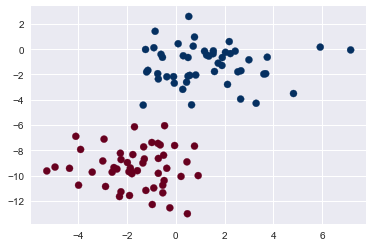

In [7]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')

[(-15, 5), (-8, 8)]

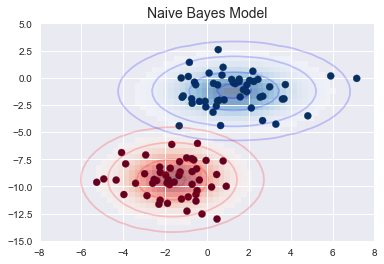

In [8]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)

fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Naive Bayes Model', size=14)

xlim = (-8, 8)
ylim = (-15, 5)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)
    
ax.set(xlim=xlim, ylim=ylim)

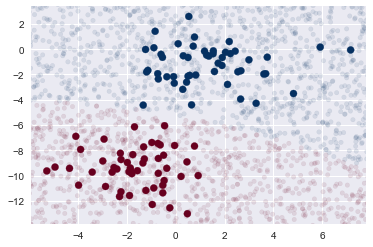

In [9]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

In [10]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

## Multinomial Naive Bayes

In [11]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [12]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [13]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [15]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

Text(92.68,0.5,'predicted label')

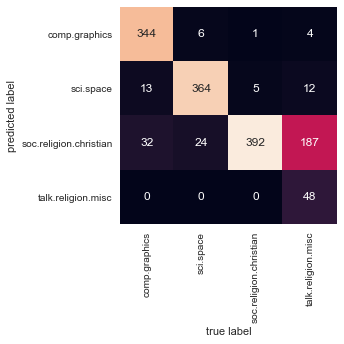

In [16]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

--------------------

# HW 2

## 1. 데이터 전처리 및 시각화

In [17]:
import pandas as pd
wine=pd.read_csv('wine.csv',names=['class','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline'])
wine.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [18]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
class                           178 non-null int64
Alcohol                         178 non-null float64
Malic acid                      178 non-null float64
Ash                             178 non-null float64
Alcalinity of ash               178 non-null float64
Magnesium                       178 non-null int64
Total phenols                   178 non-null float64
Flavanoids                      178 non-null float64
Nonflavanoid phenols            178 non-null float64
Proanthocyanins                 178 non-null float64
Color intensity                 178 non-null float64
Hue                             178 non-null float64
OD280/OD315 of diluted wines    178 non-null float64
Proline                         178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


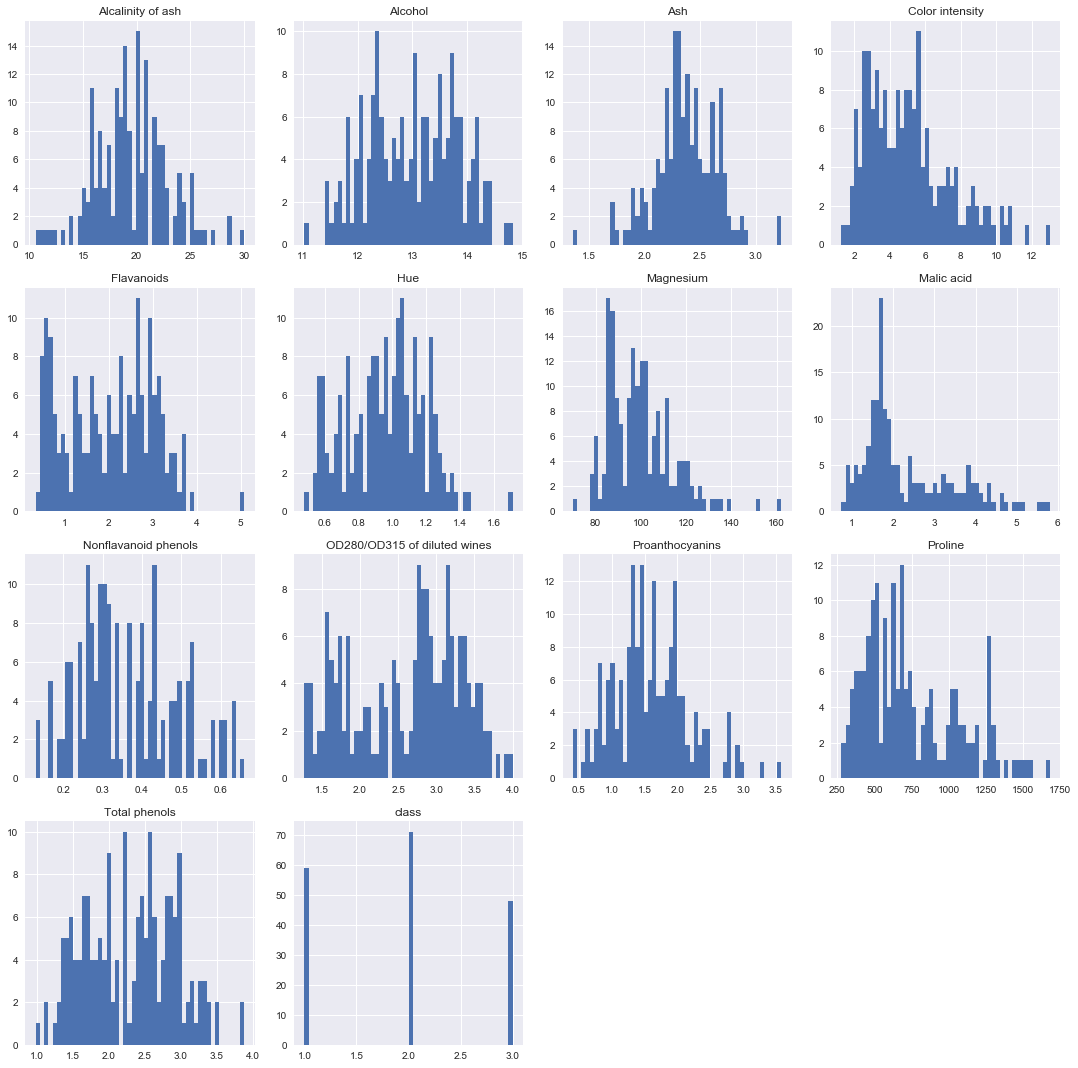

In [19]:
wine.hist(bins=50,figsize=(15,15))
plt.tight_layout()

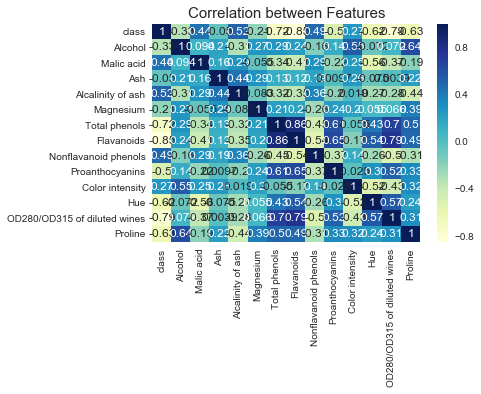

In [20]:
corr=wine.corr()
sns.heatmap(corr,annot=True,cmap='YlGnBu')
plt.title('Correlation between Features',fontsize=15)
plt.show()

**correlation의 절댓값이 큰 Features 두개 선택 (Flavanoids, OD280/OD315 of diluted wines)**

In [21]:
data=wine[['class','Flavanoids','OD280/OD315 of diluted wines']]

In [22]:
data['Flavanoids'].describe()

count    178.000000
mean       2.029270
std        0.998859
min        0.340000
25%        1.205000
50%        2.135000
75%        2.875000
max        5.080000
Name: Flavanoids, dtype: float64

In [23]:
data['OD280/OD315 of diluted wines'].describe()

count    178.000000
mean       2.611685
std        0.709990
min        1.270000
25%        1.937500
50%        2.780000
75%        3.170000
max        4.000000
Name: OD280/OD315 of diluted wines, dtype: float64

In [24]:
ht=np.linspace(0,6,500)

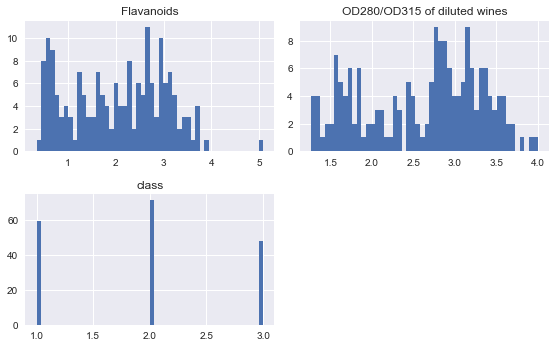

In [25]:
data.hist(bins=50,figsize=(8,5))
plt.tight_layout()

## 2. Train-Test set split하기

In [26]:
N= data.shape[0]
test = np.random.choice(np.arange(N),int(N*0.2), replace=False)
train_df = data[~data.index.isin(test)].copy()
test_df = data[data.index.isin(test)].copy()
print(train_df.shape, test_df.shape)

(143, 3) (35, 3)


In [27]:
y_train = train_df['class']
X_train = train_df[['Flavanoids','OD280/OD315 of diluted wines']]
y_test = test_df['class']
X_test = test_df[['Flavanoids','OD280/OD315 of diluted wines']]

In [28]:
# Rearrange Training data set
X_train_input = np.vstack((X_train['Flavanoids'],X_train['OD280/OD315 of diluted wines'])).T
y_train_input = np.hstack((np.repeat(1, sum(y_train==1)), np.repeat(2, sum(y_train==2)), np.repeat(3, sum(y_train==3))))
X_test_input = np.vstack((X_test['Flavanoids'],X_test['OD280/OD315 of diluted wines'])).T
y_test_input = np.hstack((np.repeat(1, sum(y_test==1)), np.repeat(2, sum(y_test==2)), np.repeat(3, sum(y_test==3))))

## 3.모델에 fitting

### A-1. LDA

In [29]:
## Fitting on LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis().fit(X_train_input,y_train_input)
w = lda.coef_; w0 = lda.intercept_
db1 = -w0[0]/w[0, 1] - w[0, 0]/w[0, 1] * ht    ## Decision boundary 1
db2 = -w0[1]/w[1, 1] - w[1, 0]/w[1, 1] * ht    ## Decision boundary 2
db3 = -w0[2]/w[2, 1] - w[2, 0]/w[2, 1] * ht    ## Decision boundary 3

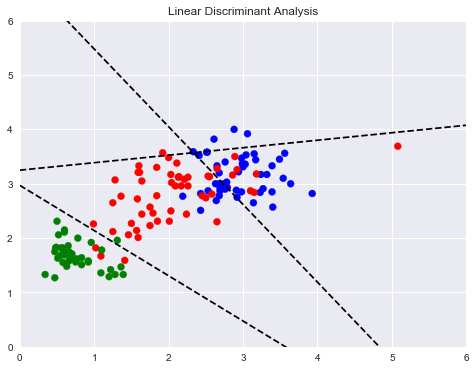

In [30]:
fig, ax = plt.subplots(figsize=(8,6))
ax.set(xlim=(0,6), ylim=(0, 6), title='Linear Discriminant Analysis')
colors=np.array(['blue','red', 'green'])
ax.scatter(X_train_input[:,0], X_train_input[:,1], color=colors[y_train_input-1])
ax.plot(ht, db1.T, label='LDA DB', color='black', linestyle='--')
ax.plot(ht, db2.T, label='LDA DB', color='black', linestyle='--')
ax.plot(ht, db3.T, label='LDA DB', color='black', linestyle='--')
plt.show()

### Test set 적용

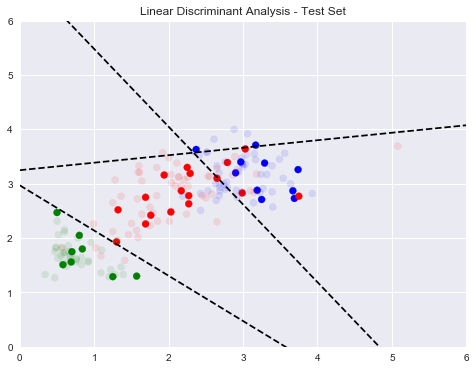

In [31]:
fig, ax = plt.subplots(figsize=(8,6))
ax.set(xlim=(0,6), ylim=(0, 6), title='Linear Discriminant Analysis - Test Set')
colors=np.array(['blue','red', 'green'])
ax.scatter(X_test_input[:,0], X_test_input[:,1], color=colors[y_test_input-1])
ax.scatter(X_train_input[:,0], X_train_input[:,1], color=colors[y_train_input-1], alpha = 0.1)
ax.plot(ht, db1.T, label='LDA DB', color='black', linestyle='--')
ax.plot(ht, db2.T, label='LDA DB', color='black', linestyle='--')
ax.plot(ht, db3.T, label='LDA DB', color='black', linestyle='--')
plt.show()

### A-2. QDA

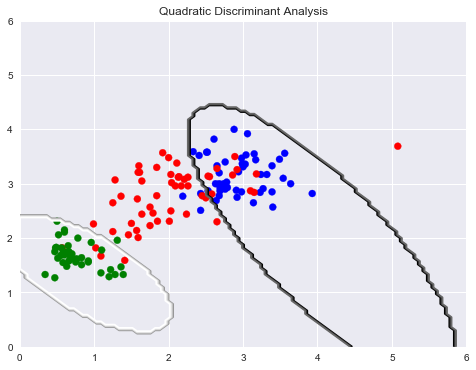

In [32]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis().fit(X_train_input,y_train_input)

fig, ax1 = plt.subplots(figsize=(8,6))
ax1.set(xlim=(0,6), ylim=(0, 6), title='Quadratic Discriminant Analysis')
colors=np.array(['blue','red', 'green'])
ax1.scatter(X_train_input[:,0], X_train_input[:,1], color=colors[y_train_input-1])

r1 = np.linspace(ax1.get_xlim()[0], ax1.get_xlim()[1], 100)
r2 = np.linspace(ax1.get_ylim()[0], ax1.get_ylim()[1], 100)
R1, R2 = np.meshgrid(r1, r2)
R = np.c_[R1.ravel(), R2.ravel()]
Z = qda.predict(R).reshape(R1.shape)
ax1.contour(R1, R2, Z, cmap="Greys_r")
plt.show()

### Test set 적용

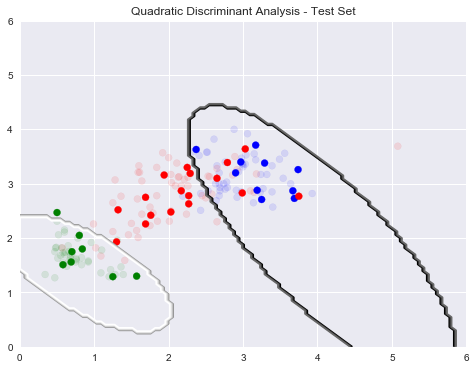

In [33]:
fig, ax1 = plt.subplots(figsize=(8,6))
ax1.set(xlim=(0,6), ylim=(0, 6), title='Quadratic Discriminant Analysis - Test Set')
colors=np.array(['blue','red', 'green'])
ax1.scatter(X_train_input[:,0], X_train_input[:,1], color=colors[y_train_input-1],alpha=0.1)
ax1.scatter(X_test_input[:,0], X_test_input[:,1], color=colors[y_test_input-1])

r1 = np.linspace(ax1.get_xlim()[0], ax1.get_xlim()[1], 100)
r2 = np.linspace(ax1.get_ylim()[0], ax1.get_ylim()[1], 100)
R1, R2 = np.meshgrid(r1, r2)
R = np.c_[R1.ravel(), R2.ravel()]
Z = qda.predict(R).reshape(R1.shape)
ax1.contour(R1, R2, Z, cmap="Greys_r")
plt.show()

### B. Logistic Regression without Feature Extraction

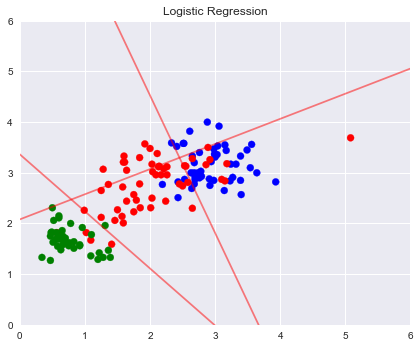

In [34]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', max_iter=1000).fit(X_train_input,y_train_input)
logreg.predict(X_train_input[:100,:]) # return class
logreg.predict_proba(X_train_input[:100,:]) # return probability

## Plot Decision Surface
fig = plt.figure(figsize=(6,5))
ax1 = fig.add_subplot(111)
ax1.scatter(X_train_input[:,0], X_train_input[:, 1], color=colors[y_train_input-1])
ax1.set(xlim=(0, 6), ylim=(0,6), title='Logistic Regression')
w = logreg.coef_; b = logreg.intercept_
db11 = -b[0]/w[0,1] - w[0,0]/w[0,1] * ht
db22 = -b[1]/w[1,1] - w[1,0]/w[1,1] * ht
db33 = -b[2]/w[2,1] - w[2,0]/w[2,1] * ht
ax1.plot(ht, db11.T, label='Decision Boundary',color='red', alpha=0.5)
ax1.plot(ht, db22.T, label='Decision Boundary',color='red', alpha=0.5)
ax1.plot(ht, db33.T, label='Decision Boundary',color='red', alpha=0.5)
fig.tight_layout()

### Test set 적용

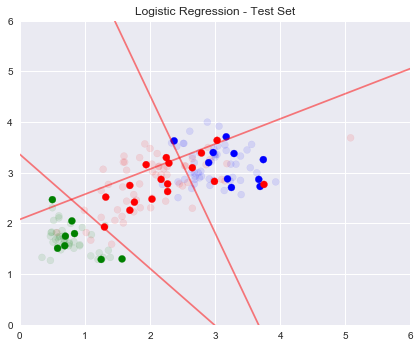

In [35]:
fig = plt.figure(figsize=(6,5))
ax1 = fig.add_subplot(111)
ax1.scatter(X_train_input[:,0], X_train_input[:, 1], color=colors[y_train_input-1],alpha=0.1)
ax1.scatter(X_test_input[:,0], X_test_input[:, 1], color=colors[y_test_input-1])
ax1.set(xlim=(0, 6), ylim=(0,6), title='Logistic Regression - Test Set')
w = logreg.coef_; b = logreg.intercept_
db11 = -b[0]/w[0,1] - w[0,0]/w[0,1] * ht
db22 = -b[1]/w[1,1] - w[1,0]/w[1,1] * ht
db33 = -b[2]/w[2,1] - w[2,0]/w[2,1] * ht
ax1.plot(ht, db11.T, label='Decision Boundary',color='red', alpha=0.5)
ax1.plot(ht, db22.T, label='Decision Boundary',color='red', alpha=0.5)
ax1.plot(ht, db33.T, label='Decision Boundary',color='red', alpha=0.5)
fig.tight_layout()

### C. Logistic Regression with Feature Extraction

In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
from sklearn.preprocessing import PolynomialFeatures
for i in range(1,4):
    poly = PolynomialFeatures(degree=i, include_bias=False) # No column of 1s
    X_poly = poly.fit_transform(X_train_input)
    logreg2 = LogisticRegression(solver='lbfgs', max_iter=1000)
    score=cross_val_score(logreg2,X_poly,y_train,cv=5)
    print("cross validation score when degree =",i,':',score.mean())

cross validation score when degree = 1 : 0.8043422733077905
cross validation score when degree = 2 : 0.8329501915708812
cross validation score when degree = 3 : 0.8260536398467433


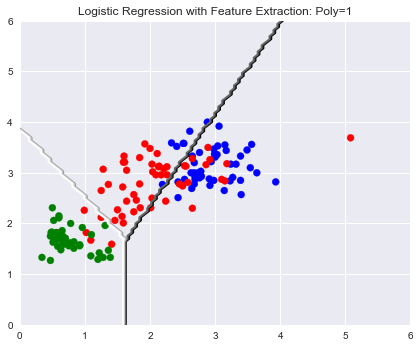

In [38]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=1, include_bias=False) # No column of 1s
X_poly = poly.fit_transform(X_train_input)
logreg2 = LogisticRegression().fit(X_poly, y_train_input)

## Plot Results
fig = plt.figure(figsize=(6,5))
ax1 = fig.add_subplot(111)
ax1.scatter(X_train_input[:,0], X_train_input[:, 1], color=colors[y_train_input-1])
ax1.set(xlim=(0, 6), ylim=(0, 6), title='Logistic Regression with Feature Extraction: Poly=1')

## Plot Decision Surface
r1 = np.linspace(ax1.get_xlim()[0], ax1.get_xlim()[1], 100)
r2 = np.linspace(ax1.get_ylim()[0], ax1.get_ylim()[1], 100)
R1, R2 = np.meshgrid(r1, r2)
R = np.c_[R1.ravel(), R2.ravel()]
R_poly = poly.fit_transform(R)
Z = logreg2.predict(R_poly).reshape(R1.shape)
plt.contour(R1, R2, Z, cmap="Greys_r")

fig.tight_layout()

### Test set 적용

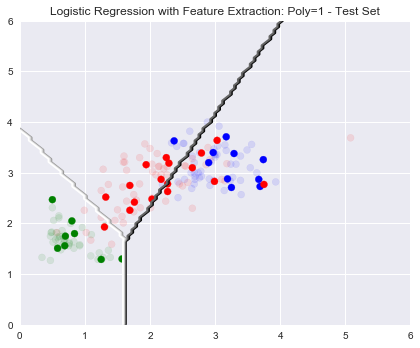

In [39]:
## Plot Results
fig = plt.figure(figsize=(6,5))
ax1 = fig.add_subplot(111)
ax1.scatter(X_train_input[:,0], X_train_input[:, 1], color=colors[y_train_input-1],alpha=0.1)
ax1.scatter(X_test_input[:,0], X_test_input[:, 1], color=colors[y_test_input-1])
ax1.set(xlim=(0, 6), ylim=(0, 6), title='Logistic Regression with Feature Extraction: Poly=1 - Test Set')

## Plot Decision Surface
r1 = np.linspace(ax1.get_xlim()[0], ax1.get_xlim()[1], 100)
r2 = np.linspace(ax1.get_ylim()[0], ax1.get_ylim()[1], 100)
R1, R2 = np.meshgrid(r1, r2)
R = np.c_[R1.ravel(), R2.ravel()]
R_poly = poly.fit_transform(R)
Z = logreg2.predict(R_poly).reshape(R1.shape)
plt.contour(R1, R2, Z, cmap="Greys_r")

fig.tight_layout()

## 4. 각 모델에 대해 Test MSE 보고하고 결과 해석하기

In [40]:
from sklearn.metrics import mean_squared_error as mse
print("LDA test mse :", mse(y_train_input,lda.predict(X_train)));
print("QDA test mse :", mse(y_train_input,qda.predict(X_train)));
print("Logistic test mse(without Feature Extraction):", mse(y_train_input,logreg.predict(X_train)));
print("Logistic test mse(with Feature Extraction):", mse(y_train_input,logreg2.predict(X_train)))

LDA test mse : 0.16083916083916083
QDA test mse : 0.1258741258741259
Logistic test mse(without Feature Extraction): 0.16783216783216784
Logistic test mse(with Feature Extraction): 0.20279720279720279


**QDA > Logistic Regression without Feature Extraction > LDA > Logistic Regression with Feature Extraction**